# Introduction to the data frame -Cristiano Ronaldo's Goal Records-

This report presents an analysis focusing on the amazing number of goals scored by Cristiano Ronaldo, a football player from Portugal who currently plays for Al Nasr in Saudi Arabia. Born in 1985, Ronaldo has also represented Portugal and continues to captivate football fans around the world with his outstanding scoring ability. This data provides a quantitative assessment of his goal scoring patterns throughout his career, his performance in important matches, and how his goals have contributed to his team's victories.

# Hypothesis
When looking back on football history, there is no doubt that the most recent two decades have been the era of Cristiano Ronaldo and Lionel Messi. Both are undoubtedly great footballers, but Messi spent the majority of his career with Barcelona FC in Spain, while Ronaldo scored goals for Portugal, England, Spain, Italy, and Saudi Arabia, among many other countries and clubs. The reason for these results is often cited as his utility in scoring goals anywhere and in any form. This report will reveal whether this is true by analyzing his goal scoring record.

In [158]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [159]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [160]:
 # To ensure all the probabilistic things are reproducible
np.random.seed(42)

# Background on Data
Dataset for this analysis, the data from the GitHub website (https://github.com/azminewasi/Cristiano-Ronaldo-Club-Goals) was used.
According to the collector and owner of the data set, the data contained in this csv file includes the following 13 columns.

Season: Football season
Competition: Name of Competition
Matchday: Number/name of the match of the league season/competition
Date: Date of match
Venue: Match Venue (Home/Away)
Club: Ronaldo’s team/club
Opponent: Opponent team/club
Result: Match result in (Home:Away) format
Playing_Position: Ronaldo’s playing position in the match
Minute: Match time while goal scored
At_score :Score-line after goal scored
Type: Goal type
Goal_assist: Assisted by

In [161]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
cr7_filename = "data.csv"

# Read the CSV files and create backup copies
cr7_df_data = pd.read_csv(data_path + cr7_filename)

# Create working copies of the dataframes for analysis
cr7_df = cr7_df_data.copy()

In [162]:
# Display all columns
pd.set_option('display.max_columns', None)
cr7_df.sample(5)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
680,21/22,Premier League,10,10/30/21,A,Manchester United,Tottenham Hotspur,0:03,CF,39,0:01,Right-footed shot,Bruno Fernandes
164,10/11,LaLiga,8,10/23/10,H,Real Madrid,Racing Santander,6:01,LW,47,4:00,Right-footed shot,Angel Di Maria
54,06/07,Premier League,37,05-05-07,A,Manchester United,Manchester City,0:01,RW,34,0:01,Penalty,NaN
640,20/21,Serie A,2,9/27/20,A,Juventus FC,AS Roma,2:02,CF,69,2:02,Header,Danilo
606,19/20,Serie A,10,10/30/19,H,Juventus FC,Genoa CFC,2:01,CF,90+6,2:01,Penalty,NaN


In [163]:
# Check its structure
cr7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            701 non-null    object
 1   Competition       701 non-null    object
 2   Matchday          701 non-null    object
 3   Date              701 non-null    object
 4   Venue             701 non-null    object
 5   Club              701 non-null    object
 6   Opponent          701 non-null    object
 7   Result            701 non-null    object
 8   Playing_Position  643 non-null    object
 9   Minute            701 non-null    object
 10  At_score          701 non-null    object
 11  Type              686 non-null    object
 12  Goal_assist       459 non-null    object
dtypes: object(13)
memory usage: 71.3+ KB


In [164]:
# Change the data type of 'Date' from object to datetime
pd.to_datetime(cr7_df['Date'])

0     2002-10-07
1     2002-10-07
2     2002-10-26
3     2002-11-24
4     2002-12-18
         ...    
696   2022-04-28
697   2022-05-02
698   2022-09-15
699   2022-10-09
700   2022-10-27
Name: Date, Length: 701, dtype: datetime64[ns]

In [165]:
# To make the change persistent, assign it to the previous dataframe
cr7_df['Date']=pd.to_datetime(cr7_df['Date'])
cr7_df.dtypes

Season                      object
Competition                 object
Matchday                    object
Date                datetime64[ns]
Venue                       object
Club                        object
Opponent                    object
Result                      object
Playing_Position            object
Minute                      object
At_score                    object
Type                        object
Goal_assist                 object
dtype: object

In [166]:
# Check the length of the data frame
len(cr7_df)

701

In [167]:
# Check the number of unique value of each column
cr7_df.nunique().sort_values()

Venue                 2
Club                  4
Playing_Position      5
Type                 11
Competition          16
Season               21
At_score             37
Matchday             52
Result               53
Goal_assist          86
Minute              106
Opponent            125
Date                464
dtype: int64

In [168]:
# Check the unique value of each column
cr7_df['Venue'].unique()

array(['H', 'A'], dtype=object)

In [169]:
# Check the unique value of each column
cr7_df['Club'].unique()

array(['Sporting CP', 'Manchester United', 'Real Madrid', 'Juventus FC'],
      dtype=object)

In [170]:
# Check the unique value of each column
cr7_df['Playing_Position'].unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [171]:
# Check the unique value of each column
cr7_df['Type'].unique()

array(['Solo run', 'Header', 'Right-footed shot', 'Left-footed shot', nan,
       'Direct free kick', 'Tap-in', 'Penalty', 'Penalty rebound',
       'Long distance kick', 'Counter attack goal',
       'Deflected shot on goal'], dtype=object)

In [172]:
# Check the unique value of each column
cr7_df['Competition'].unique()

array(['Liga Portugal', 'Taca de Portugal Placard', 'Premier League',
       'FA Cup', 'UEFA Champions League Qualifying', 'EFL Cup',
       'UEFA Champions League', 'FIFA Club World Cup', 'LaLiga',
       'Copa del Rey', 'Supercopa', 'UEFA Super Cup', 'Serie A',
       'Supercoppa Italiana', 'Italy Cup', 'Europa League'], dtype=object)

In [173]:
# Check the unique value of each column
cr7_df['Season'].unique()

array(['02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09',
       '09/10', '10/11', '11/12', 'Dec-13', '13/14', '14/15', '15/16',
       '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'],
      dtype=object)

In [174]:
# Check the unique value of each column
cr7_df['At_score'].unique()

array(['2:00', '3:00', '1:02', '1:01', '0:01', '1:00', '2:02', '2:03',
       '0:02', '1:04', '4:01', '3:01', '4:02', '0:03', '4:00', '2:01',
       '5:00', '1:03', '0:04', '0:05', '3:02', '2:04', '6:01', '5:01',
       '6:00', '7:00', '1:05', '1:06', '7:01', '0:06', '6:02', '5:02',
       '6:03', '9:01', '3:03', '1:2', '3:0'], dtype=object)

In [175]:
# Check the unique value of each column
cr7_df['Matchday'].unique()

array(['6', '8', 'Fourth Round', 'Fifth Round', '11', '29', '32', '38',
       'Final', '16', 'Third Round', '24', '25', 'Sixth Round', '30',
       'Semi-Finals', '3rd round', 'Round of 16', '20', '26', '28', '1',
       '10', '15', '17', '19', '21', '23', '6th round', 'Quarter-Finals',
       '37', 'Group Stage', '9', '12', '13', '18', '22', '27', 'last 16',
       '31', '33', '34', '36', '2', '3', '4', '35', '7', '4th round',
       '14', 'final', '5'], dtype=object)

In [176]:
# Check the unique value of each column
cr7_df['Result'].unique()

array(['3:00', '1:02', '4:01', '8:01', '4:02', '0:02', '3:01', '2:04',
       '0:04', '1:00', '1:04', '1:03', '4:00', '5:01', '1:01', '0:03',
       '3:02', '2:02', '7:01', '0:01', '2:00', '2:01', '6:00', '1:05',
       '6:5 on pens', '4:03', '5:00', '3:05', '0:05', '5:02', '2:05',
       '6:02', '6:01', '8:00', '2:03', '7:00', '0:1 AET', '2:06', '0:06',
       '3:4 on pens', '2:1 AET', '1:06', '7:03', '3:04', '4:1 AET',
       '2:08', '9:01', '10:02', '4:2 AET', '3:03', '6:03', '1:2', '3:0'],
      dtype=object)

In [177]:
# Check the unique value of each column
cr7_df['Goal_assist'].unique()

array([nan, 'Rui Jorge', 'Carlos Martins', 'Cesar Prates', 'Ryan Giggs',
       'Gary Neville', 'Paul Scholes', 'Louis Saha',
       'Ruud van Nistelrooy', 'Roy Keane', 'Wayne Rooney', 'John OShea',
       'Ji-sung Park', 'Ole Gunnar Solskjaer', 'Michael Carrick',
       'Wes Brown', 'Patrice Evra', 'Carlos Tevez', 'Nemanja Vidicâ€Ž',
       'Nani', 'Edwin van der Sar', 'Owen Hargreaves', 'Dimitar Berbatov',
       'Anderson', 'Guti', 'Esteban Granero', 'Pepe', 'Karim Benzema',
       'Gonzalo Higuain', 'Lassana Diarra', 'Ezequiel Garay', 'Kaka',
       'Marcelo', 'Sergio Ramos', 'Mesut Ozil', 'Xabi Alonso',
       'Angel Di Maria', 'Sergio Canales', 'Sami Khedira',
       'alvaro Arbeloa', 'Fabio CoentrÃ£o', 'Jose CallejÃ³n',
       'Luka Modric', 'Isco', 'Gareth Bale', 'Daniel Carvajal',
       'James Rodriguez', 'Toni Kroos', 'Chicharito', 'Lucas Vazquez',
       'Danilo', 'Jese', 'alvaro Morata', 'Nacho Fernandez',
       'Mateo Kovacic', 'Marco Asensio', 'Casemiro', 'Borja Mayoral

In [178]:
# Check the unique value of each column
cr7_df['Minute'].unique()

array(['34', '90+5', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '45+1', '21', '76', '63', '90', '12',
       '68', '14', '38', '45', '59', '23', '19', '73', '82', '10', '39',
       '84', '85', '47', '50', '77', '49', '28', '5', '62', '51', '41',
       '35', '90+3', '22', '81', '48', '70', '90+2', '69', '56', '79',
       '16', '53', '3', '24', '32', '26', '25', '30', '43', '65', '11',
       '6', '57', '61', '17', '27', '1', '75', '2', '64', '71', '18',
       '78', '29', '36', '15', '55', '86', '90+1', '72', '20', '42',
       '103', '46', '52', '90+4', '37', '66', '90+6', '31', '40', '120',
       '83', '7', '33', '97', '104', '105', '109', '90+7', '45+7', '45+2'],
      dtype=object)

In [179]:
# Check the unique value of each column
cr7_df['Opponent'].unique()

array(['Moreirense FC', 'Boavista FC', 'CD Estarreja',
       'FC Oliveira do Hospital', 'Portsmouth FC', 'Manchester City',
       'Tottenham Hotspur', 'Birmingham City', 'Aston Villa',
       'Millwall FC', 'Southampton FC', 'Exeter City', 'Arsenal FC',
       'Everton FC', 'Fulham FC', 'Newcastle United', 'Debreceni VSC',
       'Middlesbrough FC', 'West Bromwich Albion', 'Bolton Wanderers',
       'Wigan Athletic', 'Charlton Athletic', 'Reading FC', 'Watford FC',
       'AS Roma', 'AC Milan', 'Sporting CP', 'Dynamo Kyiv',
       'Blackburn Rovers', 'Derby County', 'Sunderland AFC',
       'West Ham United', 'Olympique Lyon', 'Liverpool FC', 'Chelsea FC',
       'Hull City', 'Stoke City', 'Gamba Osaka', 'FC Internazionale',
       'FC Porto', 'Deportivo de La CoruÃ±a', 'RCD Espanyol Barcelona',
       'FC ZÃ¼rich', 'Xerez CD', 'Villarreal CF', 'Olympique Marseille',
       'UD Almeria', 'Real Zaragoza', 'Malaga CF', 'CD Tenerife',
       'Sevilla FC', 'Real Valladolid CF', 'Getafe C

In [180]:
# Check the unique value of each column
cr7_df['Date'].unique()

<DatetimeArray>
['2002-10-07 00:00:00', '2002-10-26 00:00:00', '2002-11-24 00:00:00',
 '2002-12-18 00:00:00', '2003-11-01 00:00:00', '2004-02-14 00:00:00',
 '2004-03-20 00:00:00', '2004-04-10 00:00:00', '2004-05-15 00:00:00',
 '2004-05-22 00:00:00',
 ...
 '2021-12-30 00:00:00', '2022-02-15 00:00:00', '2022-03-12 00:00:00',
 '2022-04-16 00:00:00', '2022-04-23 00:00:00', '2022-04-28 00:00:00',
 '2022-05-02 00:00:00', '2022-09-15 00:00:00', '2022-10-09 00:00:00',
 '2022-10-27 00:00:00']
Length: 464, dtype: datetime64[ns]

In [182]:
# See a value counts on each categorical column
cr7_df['Season'].value_counts(dropna=False)

Season
14/15     61
11/12     60
Dec-13    55
10/11     53
13/14     51
15/16     51
17/18     44
07/08     42
16/17     42
19/20     37
20/21     36
09/10     33
18/19     28
08/09     26
21/22     24
06/07     23
05/06     12
04/05      9
03/04      6
02/03      5
22/23      3
Name: count, dtype: int64

In [183]:
cr7_df['Season']=cr7_df['Season'].str.replace('-','/')
cr7_df['Season']=cr7_df['Season'].str.replace('Dec','12')

In [185]:
cr7_df['Season']=cr7_df['Season'].str.replace('02/03','2002')
cr7_df['Season']=cr7_df['Season'].str.replace('03/04','2003')
cr7_df['Season']=cr7_df['Season'].str.replace('04/05','2004')
cr7_df['Season']=cr7_df['Season'].str.replace('05/06','2005')
cr7_df['Season']=cr7_df['Season'].str.replace('06/07','2006')
cr7_df['Season']=cr7_df['Season'].str.replace('07/08','2007')
cr7_df['Season']=cr7_df['Season'].str.replace('08/09','2008')
cr7_df['Season']=cr7_df['Season'].str.replace('09/10','2009')
cr7_df['Season']=cr7_df['Season'].str.replace('10/11','2010')
cr7_df['Season']=cr7_df['Season'].str.replace('11/12','2011')
cr7_df['Season']=cr7_df['Season'].str.replace('12/13','2012')
cr7_df['Season']=cr7_df['Season'].str.replace('13/14','2013')
cr7_df['Season']=cr7_df['Season'].str.replace('14/15','2014')
cr7_df['Season']=cr7_df['Season'].str.replace('15/16','2015')
cr7_df['Season']=cr7_df['Season'].str.replace('16/17','2016')
cr7_df['Season']=cr7_df['Season'].str.replace('17/18','2017')
cr7_df['Season']=cr7_df['Season'].str.replace('18/19','2018')
cr7_df['Season']=cr7_df['Season'].str.replace('19/20','2019')
cr7_df['Season']=cr7_df['Season'].str.replace('20/21','2020')
cr7_df['Season']=cr7_df['Season'].str.replace('21/22','2021')
cr7_df['Season']=cr7_df['Season'].str.replace('22/23','2022')

In [187]:
cr7_df['Season']=cr7_df['Season'].str.strip()
cr7_df['Season']=cr7_df['Season'].str.lower()
cr7_df['Season']=cr7_df['Season'].astype('category')
cr7_df['Season']

0      2002
1      2002
2      2002
3      2002
4      2002
       ... 
696    2021
697    2021
698    2022
699    2022
700    2022
Name: Season, Length: 701, dtype: category
Categories (21, object): ['2002', '2003', '2004', '2005', ..., '2019', '2020', '2021', '2022']

In [188]:
cr7_df['Season'].value_counts(dropna=False)

Season
2014    61
2011    60
2012    55
2010    53
2013    51
2015    51
2017    44
2007    42
2016    42
2019    37
2020    36
2009    33
2018    28
2008    26
2021    24
2006    23
2005    12
2004     9
2003     6
2002     5
2022     3
Name: count, dtype: int64

In [189]:
# See value counts on each categorical column
cr7_df['Competition'].value_counts(dropna=False)

Competition
LaLiga                              311
UEFA Champions League               140
Premier League                      103
Serie A                              81
Copa del Rey                         22
FA Cup                               13
FIFA Club World Cup                   7
EFL Cup                               4
Supercopa                             4
Italy Cup                             4
Liga Portugal                         3
Taca de Portugal Placard              2
UEFA Super Cup                        2
Supercoppa Italiana                   2
Europa League                         2
UEFA Champions League Qualifying      1
Name: count, dtype: int64

In [190]:
# See a value counts on each categorical column
cr7_df['Matchday'].value_counts(dropna=False)

Matchday
Group Stage       75
last 16           34
Quarter-Finals    31
Semi-Finals       26
29                20
6                 18
8                 18
23                18
20                17
Final             16
13                16
37                16
18                16
22                15
27                15
25                15
12                15
35                15
3                 14
14                14
21                14
28                14
38                13
9                 13
15                13
17                13
10                13
24                13
31                13
36                13
34                12
11                12
30                11
4                 11
26                10
33                10
19                10
16                10
5                  9
32                 8
7                  8
2                  7
1                  6
Fifth Round        4
final              4
Third Round        3
Fourth Round       3
Sixt

In [191]:
# See a value counts on each categorical column
cr7_df['Venue'].value_counts(dropna=False)

Venue
H    403
A    298
Name: count, dtype: int64

In [192]:
# See a value counts on each categorical column
cr7_df['Club'].value_counts(dropna=False)

Club
Real Madrid          450
Manchester United    145
Juventus FC          101
Sporting CP            5
Name: count, dtype: int64

In [193]:
# See a value counts on each categorical column
cr7_df['Opponent'].value_counts(dropna=False)

Opponent
Sevilla FC            27
Atletico de Madrid    25
Getafe CF             23
Celta de Vigo         20
FC Barcelona          20
                      ..
Gamba Osaka            1
FC Internazionale      1
FC Porto               1
AJ Auxerre             1
Exeter City            1
Name: count, Length: 125, dtype: int64

In [194]:
# See a value counts on each categorical column
cr7_df['Result'].value_counts(dropna=False)

Result
3:00           49
2:01           41
1:02           37
4:00           36
0:02           36
2:00           35
1:04           32
3:01           32
4:01           31
3:02           28
1:03           27
2:02           25
5:01           24
0:03           23
1:01           21
0:04           16
4:02           15
2:03           13
0:01           12
5:00           12
7:01           11
0:05           10
0:06           10
5:02            9
4:03            7
6:00            7
8:00            7
2:06            7
2:04            6
7:03            6
1:05            6
1:06            6
6:01            6
4:2 AET         6
1:00            6
9:01            5
6:02            5
3:04            5
3:03            4
6:03            4
2:08            3
8:01            3
7:00            3
3:4 on pens     2
2:05            2
3:05            2
10:02           2
1:2             1
0:1 AET         1
4:1 AET         1
2:1 AET         1
6:5 on pens     1
3:0             1
Name: count, dtype: int64

In [195]:
# See a value counts on each categorical column
cr7_df['Playing_Position'].value_counts(dropna=False)

Playing_Position
LW     356
CF     200
RW      79
NaN     58
LW       5
CF       3
Name: count, dtype: int64

In [196]:
# See a value counts on each categorical column
cr7_df['Minute'].value_counts(dropna=False)

Minute
90      17
45      15
89      15
76      14
70      14
        ..
105      1
109      1
90+7     1
45+7     1
45+2     1
Name: count, Length: 106, dtype: int64

In [201]:
# See a value counts on each categorical column
cr7_df['At_score'].value_counts(dropna=False)

At_score
1:00    111
0:01     94
2:00     74
1:01     52
0:02     48
3:00     42
2:01     35
1:02     29
0:03     28
2:02     20
3:01     20
4:00     18
1:03     17
3:02     16
4:01     14
0:04     11
5:01     11
1:04     10
5:00      8
4:02      5
0:06      4
2:03      4
6:00      4
1:06      4
0:05      3
1:05      3
6:03      2
6:02      2
7:00      2
6:01      2
2:04      2
5:02      1
3:03      1
3:0       1
1:2       1
7:01      1
9:01      1
Name: count, dtype: int64

In [202]:
# See a value counts on each categorical column
cr7_df['Type'].value_counts(dropna=False)

Type
right-footed shot         251
penalty                   129
header                    112
left-footed shot          111
direct free kick           48
NaN                        15
tap-in                     14
long distance kick          9
counter attack goal         5
penalty rebound             3
deflected shot on goal      2
solo run                    2
Name: count, dtype: int64

In [203]:
# See a value counts on each categorical column
cr7_df['Goal_assist'].value_counts(dropna=False)

Goal_assist
NaN                242
karim benzema       44
gareth bale         29
mesut ozil          26
marcelo             23
                  ... 
cesar prates         1
merih demiral        1
ji-sung park         1
mason greenwood      1
adrien rabiot        1
Name: count, Length: 87, dtype: int64

In [204]:
# Apply same transformation for rest of the category columns
for col in ['Competition', 
            'Matchday', 'Venue','Club',
            'Opponent','Result','Playing_Position',
           'Minute', 'At_score', 'Type', 'Goal_assist']:
    cr7_df[col]=cr7_df[col].str.strip()
    cr7_df[col]=cr7_df[col].str.lower()
    cr7_df[col]=cr7_df[col].astype('category')

In [205]:
cr7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Season            701 non-null    category      
 1   Competition       701 non-null    category      
 2   Matchday          701 non-null    category      
 3   Date              701 non-null    datetime64[ns]
 4   Venue             701 non-null    category      
 5   Club              701 non-null    category      
 6   Opponent          701 non-null    category      
 7   Result            701 non-null    category      
 8   Playing_Position  643 non-null    category      
 9   Minute            701 non-null    category      
 10  At_score          701 non-null    category      
 11  Type              686 non-null    category      
 12  Goal_assist       459 non-null    category      
dtypes: category(12), datetime64[ns](1)
memory usage: 35.0 KB


# Descriptive Statistics
Descriptive statistics are useful as an initial step in data analysis and are very helpful in summarizing and understanding data. In this data set, there are no numeric columns, so it is difficult to obtain insight from the output, but the results are summarized below.

In [206]:
# Snapshot of numeric columns
cr7_df.describe()

,Date
count,701
mean,2014-01-13 07:17:32.781740288
min,2002-10-07 00:00:00
25%,2010-12-04 00:00:00
50%,2013-12-22 00:00:00
75%,2017-05-17 00:00:00
max,2022-10-27 00:00:00


In [207]:
# Snapshot of all columns
cr7_df.describe(include='all')

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,701,701,701,701,701,701,701,701,643,701,701,686,459
unique,21,16,51,NaN,2,4,125,53,3,106,37,11,86
top,2014,laliga,group stage,NaN,h,real madrid,sevilla fc,3:00,lw,90,1:00,right-footed shot,karim benzema
freq,61,311,75,NaN,403,450,27,49,361,17,111,251,44
mean,NaN,NaN,NaN,2014-01-13 07:17:32.781740288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2002-10-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2010-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2013-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2022-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Values
After examining the missing values, we found that missing values exist in three columns in the current dataset: Playing_Position, Type, and Goal_assist. Among them, missing values in Goal_assist were large, accounting for about 1/3 of the total. Since the number of rows containing even a single missing value is 40% of the total, we must be careful when handling missing values.

Cutting this column for goal_assist, which has the most missing values, may cause a decrease in the reliability of the entire data set.
In addition, Goal_assist is not removed in this analysis because in football to begin with, a goal can be recorded by oneself alone without an assist.
Instead, a policy of deleting records with even one missing value in Playing_Position or Type was adopted.

As a result, there were only 217 missing values for Goal_assist in the entire data set.

In [208]:
# To see the missing values in the dataset
cr7_df.isna()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,False,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False,True
698,False,False,False,False,False,False,False,False,False,False,False,False,True
699,False,False,False,False,False,False,False,False,True,False,False,False,False


In [209]:
# To see the number of missing values in each row
cr7_df.isna().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

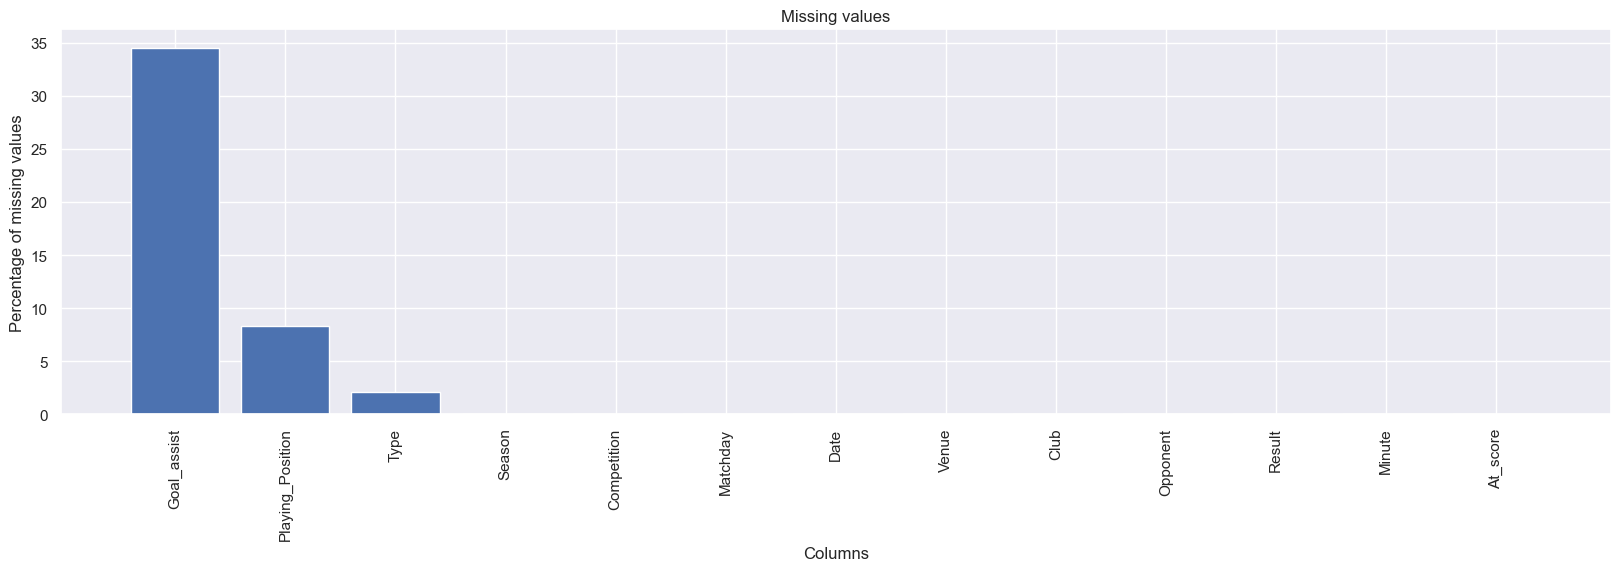

In [210]:
# Visualize null values
def visualize_null(dataframe,percentage=True):
    null_series=cr7_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(cr7_df)

In [211]:
# Check if any row has a missing value (axis=1)
# Just interested in those that at least have one NA
missing_data=cr7_df[cr7_df.isna().sum(axis=1)>0]
missing_data.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,2002,liga portugal,6,2002-10-07,h,sporting cp,moreirense fc,3:00,lw,34,2:00,solo run,NaN
2,2002,liga portugal,8,2002-10-26,a,sporting cp,boavista fc,1:02,NaN,88,1:02,right-footed shot,carlos martins
3,2002,taca de portugal placard,fourth round,2002-11-24,h,sporting cp,cd estarreja,4:01,NaN,67,3:00,left-footed shot,cesar prates
4,2002,taca de portugal placard,fifth round,2002-12-18,h,sporting cp,fc oliveira do hospital,8:01,NaN,13,3:00,NaN,NaN
5,2003,premier league,11,2003-11-01,h,manchester united,portsmouth fc,3:00,rw,80,2:00,direct free kick,NaN


In [212]:
# Check the percentage of rows which includes at least one missing value
len(missing_data)/len(cr7_df)*100

40.08559201141227

In [213]:
columns_not_Goal_assist=[col for col in cr7_df.columns 
                 if col!='Goal_assist'] 

cr7_no_nulls = cr7_df.dropna(subset=columns_not_Goal_assist)
cr7_no_nulls.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,2002,liga portugal,6,2002-10-07,h,sporting cp,moreirense fc,3:00,lw,34,2:00,solo run,NaN
1,2002,liga portugal,6,2002-10-07,h,sporting cp,moreirense fc,3:00,lw,90+5,3:00,header,rui jorge
5,2003,premier league,11,2003-11-01,h,manchester united,portsmouth fc,3:00,rw,80,2:00,direct free kick,NaN
6,2003,fa cup,fifth round,2004-02-14,h,manchester united,manchester city,4:02,rw,74,3:00,right-footed shot,NaN
10,2003,fa cup,final,2004-05-22,h,manchester united,millwall fc,3:00,rw,44,1:00,header,gary neville


In [214]:
cr7_no_nulls.isna().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  0
Goal_assist         217
dtype: int64

# Duplicate Rows
There were no duplicate rows in the data set used in this report.

In [215]:
cr7_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
696    False
697    False
698    False
699    False
700    False
Length: 701, dtype: bool

In [216]:
cr7_df[cr7_df.duplicated()]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist


# Outliers, Incorrect and corrupted data
In the dataset used in this report, all columns except ‘Date' were category data type and not numeric value, so there were no outliers.

In [217]:
# Visualize the distributions of all numeric collumns
numeric_cr7_df=cr7_df.select_dtypes(np.number)
numeric_cr7_df

""
0
1
2
3
4
...
696
697
698
699


# EDA (Exploratory Data Analysis)
Analyze and visualize the cleaned data set to reveal the structure and insights that the data set contains.

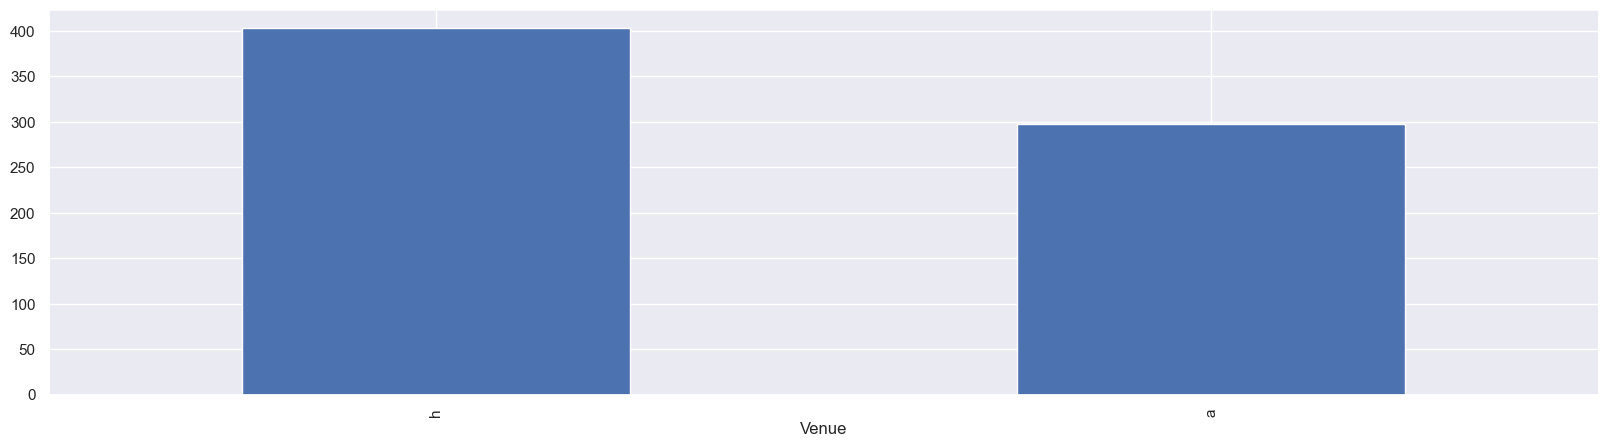

In [229]:
# Check the Number of goals scored by Venue
cr7_df['Venue'].value_counts().plot(kind='bar');

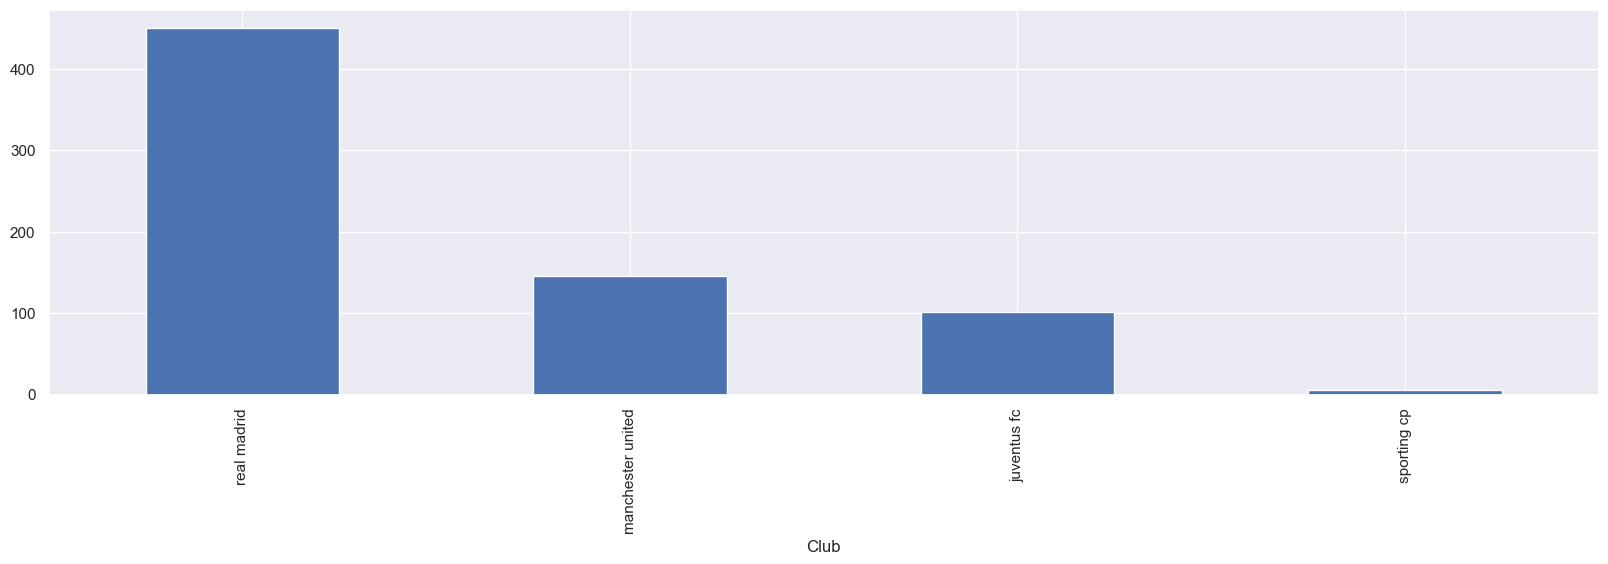

In [225]:
# Check the Number of total goals scored by team
cr7_df['Club'].value_counts().plot(kind='bar');

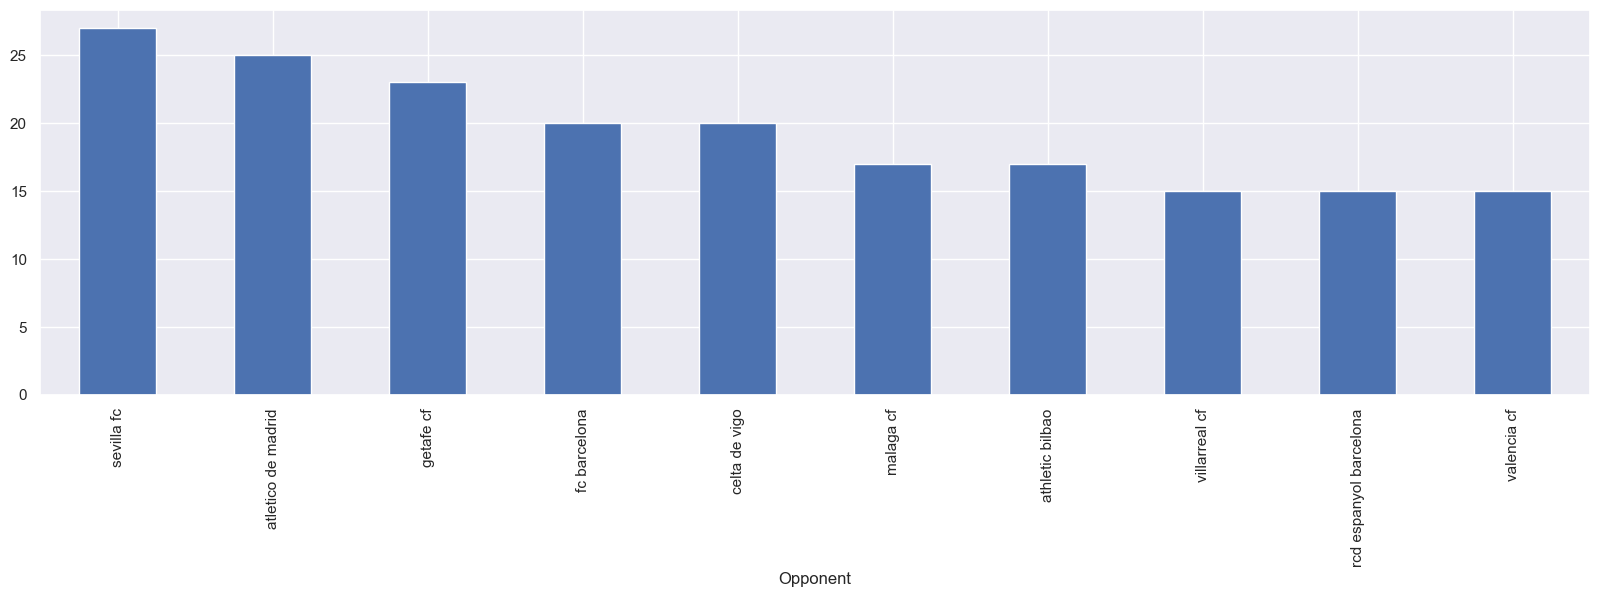

In [226]:
# Top10 Favorite Opponents
cr7_df['Opponent'].value_counts().head(10).plot(kind='bar');

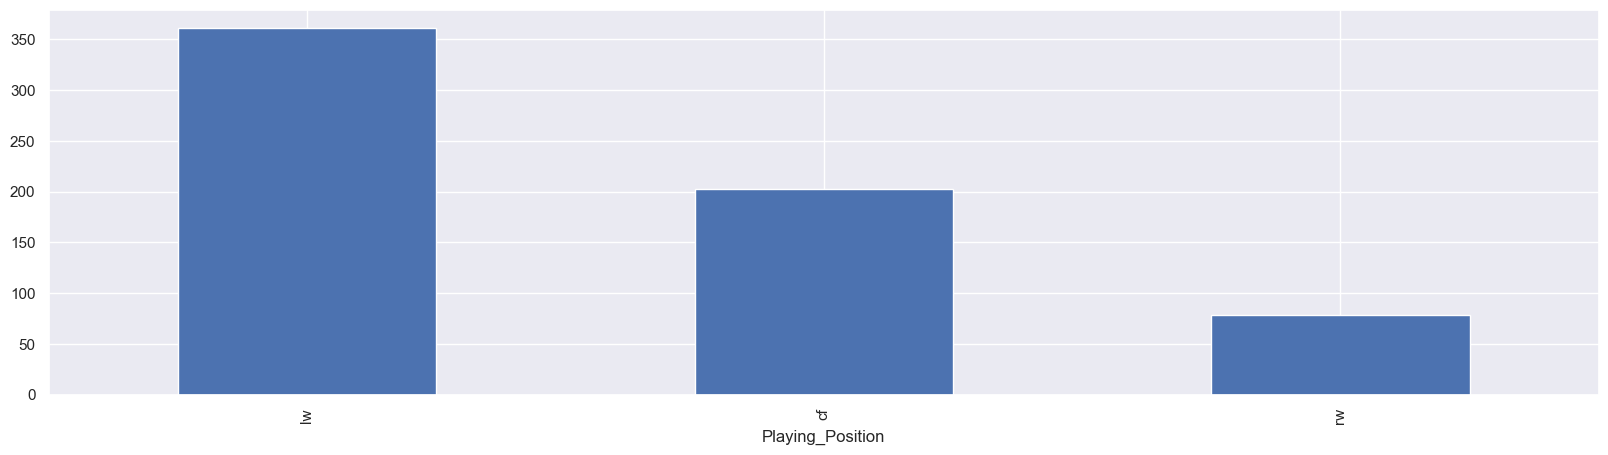

In [233]:
# Check the Number of total career goals scored by Playing Position
cr7_df['Playing_Position'].value_counts().plot(kind='bar');

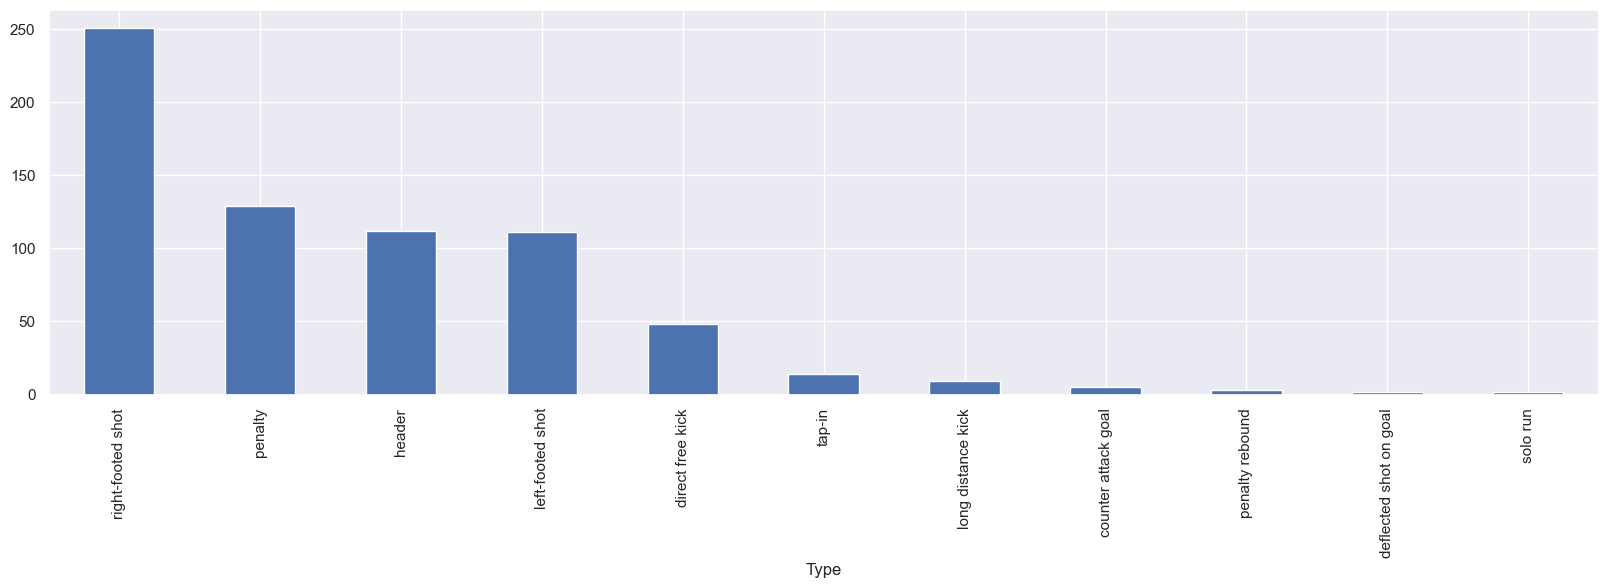

In [234]:
# Check the Number of total career goals scored by Goal Type
cr7_df['Type'].value_counts().plot(kind='bar');

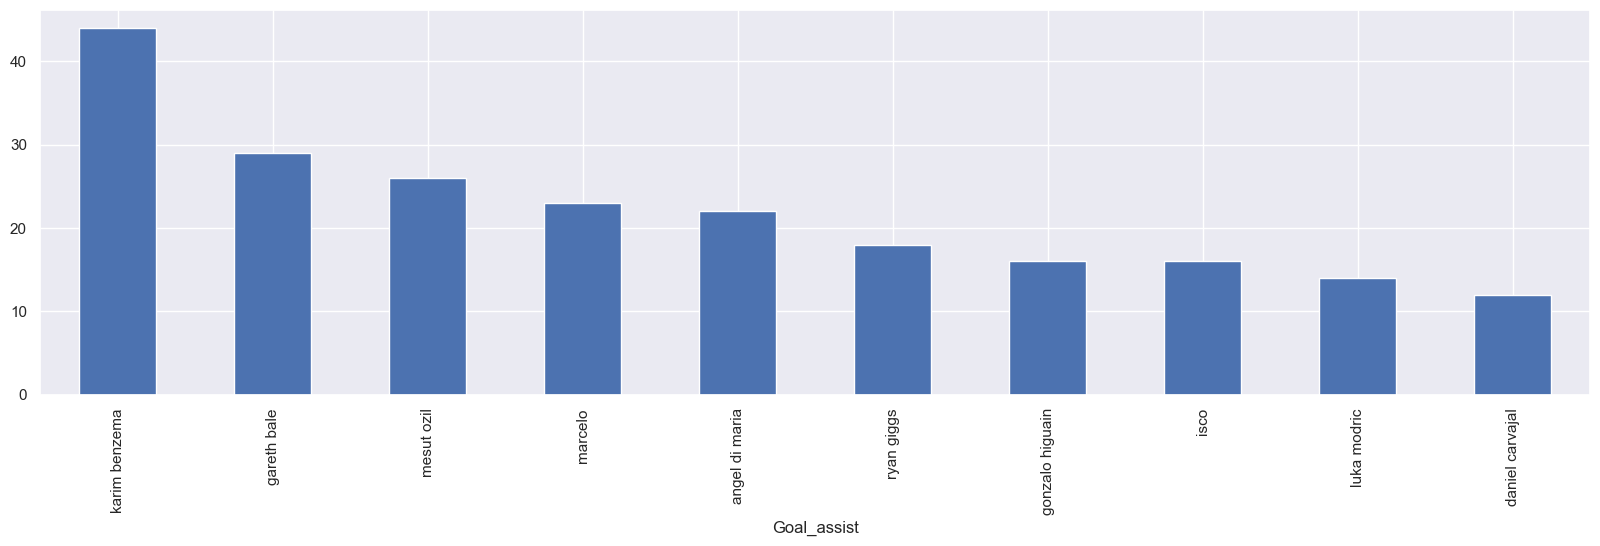

In [235]:
# Check the Number of total career goals scored assisted by
cr7_df['Goal_assist'].value_counts().head(10).plot(kind='bar');

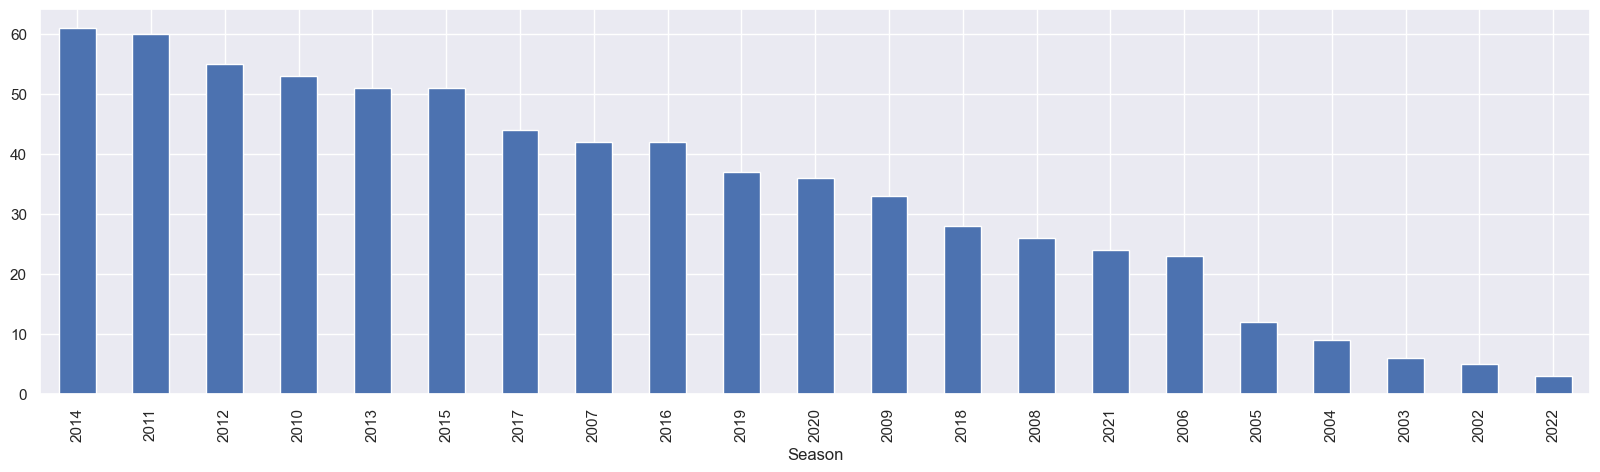

In [238]:
# Check the Number of total career goals scored by season
cr7_df['Season'].value_counts().plot(kind='bar');

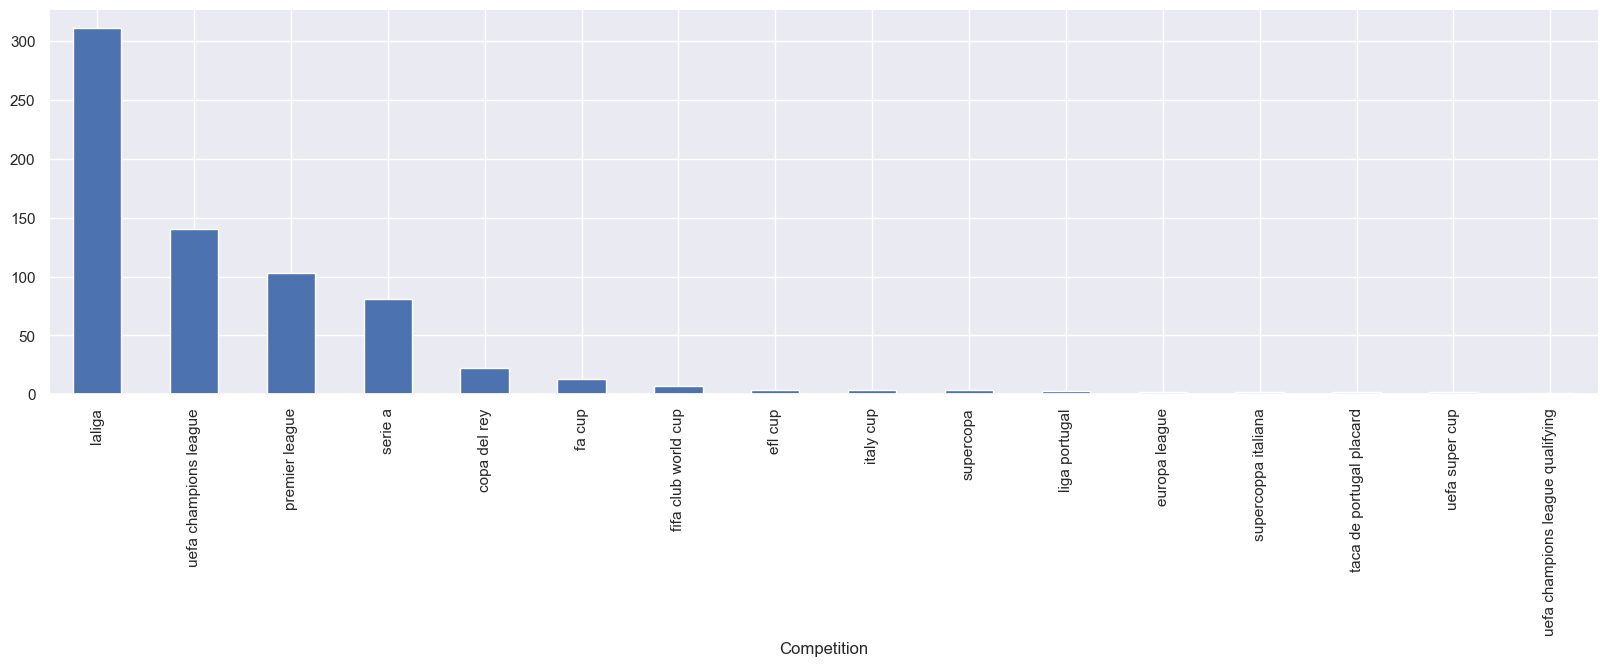

In [239]:
# Check the Number of total career goals scored by Competition
cr7_df['Competition'].value_counts().plot(kind='bar');

# Grouping data and making aggregations
Attempted to simplify the analysis and gain insight by grouping complex data sets into more manageable groups.

## Number of goals scored each year by team
Starting his career at Sporting CP in Portugal, Ronaldo became one of the most famous footballers at Manchester United and scored the most goals in his career at Real Madrid in Spain. He then played for Juventus FC and Manchester United. (After leaving Juventus FC in 2020, he played two years for his old club, Manchester United, for the 2021 and 2022 seasons.)

In [220]:
# Check the Number of goals scored each year by team
pd.DataFrame(cr7_df.Season.value_counts())

,count
Season,
2014,61
2011,60
2012,55
2010,53
2013,51
2015,51
2017,44
2007,42
2016,42


In [221]:
px.histogram(
    cr7_df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

## Number of total career goals scored by competition
In terms of clubs, Real Madrid, Manchester United, and Juventus FC have the most goals scored, in that order, as if linked to the length of his tenure with the club.

Notably, Ronaldo scored the second most goals in the UEFA Champions League, the competition that crowns European club champions, after Real Madrid. This result shows that Ronaldo, in addition to his success in his own league, has taken the path of a more special player by scoring more goals in the UEFA Champions League, where people around the world pay the most attention.

In [222]:
# Check the Number of total career goals scored by competition
pd.DataFrame(cr7_df.Competition.value_counts())

,count
Competition,
laliga,311
uefa champions league,140
premier league,103
serie a,81
copa del rey,22
fa cup,13
fifa club world cup,7
efl cup,4
italy cup,4


In [223]:
px.histogram(
    cr7_df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

# Number of total career goals scored by team and year
An examination of the total number of career goals by team and year shows that, by comparison, there are more goals per year during his tenure with Read Madrid, but similarly, it is clear that Ronaldo has consistently scored a goal every year for 20 years.

In [236]:
px.histogram(
    cr7_df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

# Number of total career goals scored by team and competition
Most of his goals in the UEFA Champions League were scored during his time with Read Madrid.

In [237]:
px.histogram(
    cr7_df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

# Number of total career goals scored by team and playing position
Early in his career, Ronaldo often played on the right wing, but since moving to Real Madrid, he has often played on the left wing or CF, scoring the most goals when he played on the left wing.

In [240]:
px.histogram(
    cr7_df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

# Number of total career goals scored by team and competition
Most of his goals in the UEFA Champions League were scored during his time with Read Madrid.

In [241]:
px.histogram(
    cr7_df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

# Number of total career goals scored by team and competition
Most of his goals in the UEFA Champions League were scored during his time with Read Madrid.

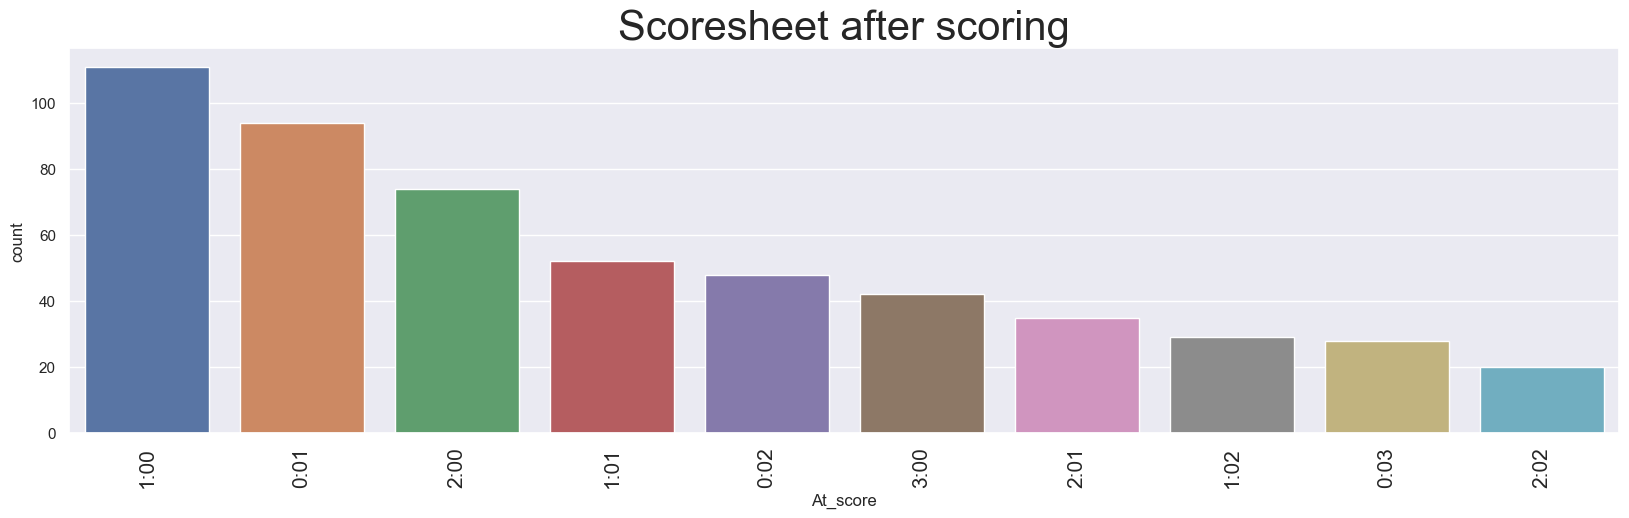

In [242]:
sns.set(rc={'figure.figsize':(20,5)})

p = sns.countplot(
    x='At_score', 
    data=cr7_df, 
    order=cr7_df['At_score'].value_counts().head(10).sort_values(ascending=False).index
)

plt.xticks(fontsize=15, rotation='vertical')
p.axes.set_title("Scoresheet after scoring", fontsize=30)
plt.show()